In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import bats
import hera_tda as hera
import hera_tda.bottleneck

# Basic Example

In [40]:
pX = [[1.0, 2.0], [2.0,3.0]]
pY = [[1.1, 2.1], [2.1, 3.1]]
d, inds = hera.bottleneck.BottleneckDistance(pX, pY)
d

0.10000000000000009

`d` is the computed bottleneck distance

`inds` is a tuple containing the indices of `pX` and `pY` that were the maximum-weight matching (`-1` is used to indicate a diagonal point).

# Example Data

Let's compare the persistent homology of two data sets: `X` and `Y`

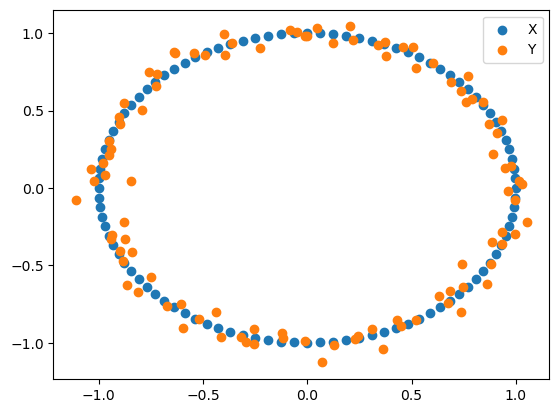

In [18]:
n = 100
sigma = 0.05
thetas = np.arange(0, n) * 2 * np.pi / n
rs = np.ones(n)
X = np.hstack(((rs * np.cos(thetas)).reshape(-1,1), (rs * np.sin(thetas)).reshape(-1,1)))
plt.scatter(X[:,0], X[:,1], label='X')

Y = X + sigma*np.random.randn(*X.shape)
plt.scatter(Y[:,0], Y[:,1], label='Y')
plt.legend()
plt.show()

# Option 1: BATS interface

In [19]:
FX = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), np.inf, 2)
FY = bats.LightRipsFiltration(bats.DataSet(bats.Matrix(Y)), bats.Euclidean(), np.inf, 2)

In [20]:
RX = bats.reduce(FX, bats.F2(), bats.standard_reduction_flag(), bats.clearing_flag())
RY = bats.reduce(FY, bats.F2(), bats.standard_reduction_flag(), bats.clearing_flag())

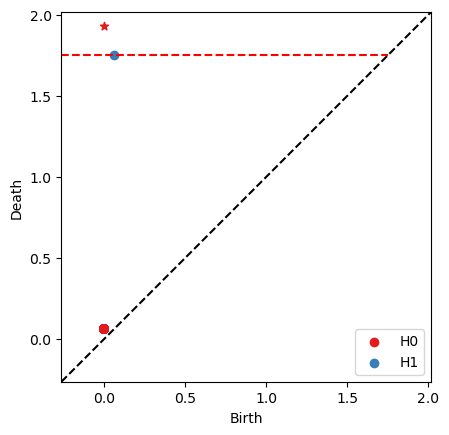

In [24]:
pX = RX.persistence_pairs(0) + RX.persistence_pairs(1)
bats.persistence_diagram(pX)
plt.show()

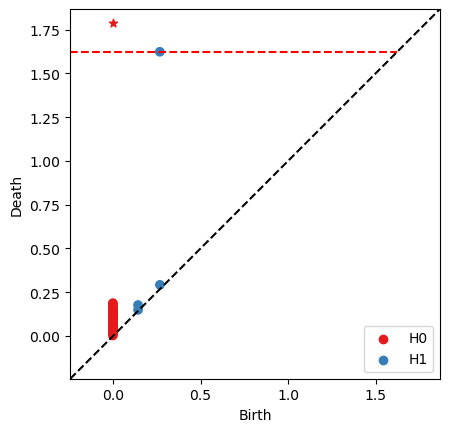

In [25]:
pY = RY.persistence_pairs(0) + RY.persistence_pairs(1)
bats.persistence_diagram(pY)
plt.show()

In [28]:
dim = 0
pX = RX.persistence_pairs(dim)
pY = RY.persistence_pairs(dim)

returns the distance as well as the indices matched in the longest edge

In [29]:
t0 = time.monotonic()
d, inds = hera.bottleneck.BottleneckDistance(pX, pY)
t1 = time.monotonic()
print("exact: ", t1 - t0, "sec.")
print("\tdist = ", d)

t0 = time.monotonic()
d, inds = hera.bottleneck.BottleneckDistanceApprox(pX, pY, 0.001)
t1 = time.monotonic()
print("approx: ", t1 - t0, "sec.")
print("\tdist = ", d)

exact:  0.013682242017239332 sec.
	dist =  0.0939931781536893
approx:  0.005623404984362423 sec.
	dist =  0.09408278768344328


Comparsion vs. persim

In [16]:
import persim

In [17]:
p1 = hera.bottleneck.Pairs(pX)
p2 = hera.bottleneck.Pairs(pY)
t0 = time.monotonic()
d, match = persim.bottleneck(p1, p2, matching=True)
t1 = time.monotonic()
print("persim: ", t1 - t0, "sec.")
print("\tdist = ", d)

persim:  0.3667100620223209 sec.
	dist =  0.08581392021653762


## Removal of zero-length pairs

Hera needs you to remove zero-length pairs (on the diagonal)

In [30]:
dim = 1
pX = [p for p in RX.persistence_pairs(dim) if p.length() > 0]
pY = [p for p in RY.persistence_pairs(dim) if p.length() > 0]

d, inds = hera.bottleneck.BottleneckDistance(pX, pY)
print("dist = ", d)

dist =  0.20474667780302924


## Option 2: General Interface

If you're using a library other than BATS, you can also just pass `n x 2` numpy arrays or Python lists instead of a list of `bats.PersistencePair`s

In [36]:
pX2 = np.array([[p.birth(), p.death()] for p in pX])
pY2 = [[p.birth(), p.death()] for p in pY]
pY2

[[0.14335646905212143, 0.17722226326657262],
 [0.14357583299564372, 0.14983973826128077],
 [0.2675681959592872, 1.6231118126856905],
 [0.2679990507004248, 0.2925391950871435]]

In [37]:
d, inds = hera.bottleneck.BottleneckDistance(pX2, pY2)
print("dist = ", d)

dist =  0.20474667780302924
